In [13]:
import sys
sys.path.append('../src')

import importlib
import dyn_accept_loop as dal
import logreg_augmented as lra
importlib.reload(dal)

import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import torch

## Test importable Dynamic Acceptance Loop

c:\Projects\Information-Systems-Seminar\.venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Itteration: 0) Accepted: 729 | Denied: 1701 - New train set size: (6729, 115)
Itteration: 1) Accepted: 729 | Denied: 1701 - New train set size: (7458, 115)
Itteration: 2) Accepted: 729 | Denied: 1701 - New train set size: (8187, 115)
Itteration: 3) Accepted: 729 | Denied: 1701 - New train set size: (8916, 115)
Itteration: 4) Accepted: 729 | Denied: 1701 - New train set size: (9645, 115)
Itteration: 5) Accepted: 729 | Denied: 1701 - New train set size: (10374, 115)
Itteration: 6) Accepted: 729 | Denied: 1701 - New train set size: (11103, 115)
Itteration: 7) Accepted: 729 | Denied: 1701 - New train set size: (11832, 115)
Itteration: 8) Accepted: 729 | Denied: 1701 - New train set size: (12561, 115)
Itteration: 9) Accepted: 729 | Denied: 1701 - New train set size: (13290, 115)
Itteration: 10) Accepted: 729 | Denied: 1701 - New train set size: (14019, 115)
Itteration: 11) Accepted: 729 | Denied: 1701 - New train set size: (14748, 115)
Itteration: 12) Accepted: 729 | Denied: 1701 - New trai

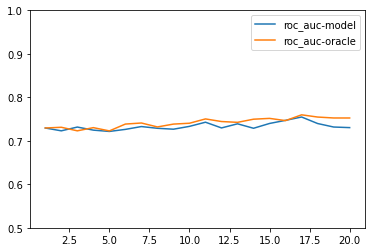

In [17]:
n_years = 20

sim = dal.Simulate_acceptance_loop("paipaidai.csv", lgbm.LGBMClassifier(), 0.1, 0.1, n_years, norm_features=False)
results_generator = sim.run()

metrics = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics = iteration[3]
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()

## Test importable Autoencoder

In [21]:
import autoencoder as aenc
import importlib
importlib.reload(aenc)

<module 'autoencoder' from 'c:\\Projects\\Information-Systems-Seminar\\reject-infer-autoencoder\\notebooks\\../src\\autoencoder.py'>

Autoencoder(
  (enc): ModuleList()
  (dec): ModuleList(
    (0): Linear(in_features=12, out_features=55, bias=True)
    (1): Linear(in_features=55, out_features=40, bias=True)
    (2): Linear(in_features=40, out_features=55, bias=True)
    (3): Linear(in_features=55, out_features=12, bias=True)
  )
)
Epoch 1 of 50, Train Loss: 0.994
Epoch 2 of 50, Train Loss: 0.975
Epoch 3 of 50, Train Loss: 0.950
Epoch 4 of 50, Train Loss: 0.916
Epoch 5 of 50, Train Loss: 0.874
Epoch 6 of 50, Train Loss: 0.826
Epoch 7 of 50, Train Loss: 0.774
Epoch 8 of 50, Train Loss: 0.721
Epoch 9 of 50, Train Loss: 0.670
Epoch 10 of 50, Train Loss: 0.622
Epoch 11 of 50, Train Loss: 0.580
Epoch 12 of 50, Train Loss: 0.542
Epoch 13 of 50, Train Loss: 0.508
Epoch 14 of 50, Train Loss: 0.478
Epoch 15 of 50, Train Loss: 0.452
Epoch 16 of 50, Train Loss: 0.429
Epoch 17 of 50, Train Loss: 0.410
Epoch 18 of 50, Train Loss: 0.397
Epoch 19 of 50, Train Loss: 0.388
Epoch 20 of 50, Train Loss: 0.383
Epoch 21 of 50, Train Loss:

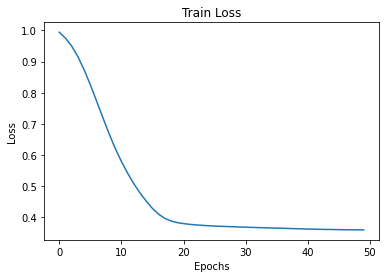

In [24]:
BATCH_SIZE = 1000
EPOCHS = 50

dataset = aenc.CreditscoringDataset("hmeq.csv")      # load and prepare Dataset to Tensor
data_loader = aenc.DataLoader(                       # create Dataloader for batching
    dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

shape = [dataset.x.shape[1], 55, 40, 55, dataset.x.shape[1]]  # define shape of Autoencoder
net = aenc.Autoencoder(shape)
print(net)
net.to("cpu")

train_loss = aenc.train(net, data_loader, EPOCHS)               

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
# Use trained Autoencoder
net.encode(torch.rand(10, 68))

tensor([[0.4882, 0.3118, 0.1544, 0.5775, 0.5333, 0.3124, 0.9680, 0.4250, 0.9740,
         0.7062, 0.4290, 0.2169, 0.7859, 0.6176, 0.6191, 0.5997, 0.2627, 0.9281,
         0.9204, 0.3620, 0.6429, 0.5139, 0.6015, 0.2412, 0.7099, 0.3018, 0.7999,
         0.6174, 0.5979, 0.3035, 0.4598, 0.7445, 0.8499, 0.5695, 0.4661, 0.6120,
         0.2057, 0.3934, 0.9198, 0.2736, 0.2643, 0.9676, 0.7221, 0.5592, 0.1422,
         0.3361, 0.1098, 0.2355, 0.9175, 0.5058, 0.5015, 0.2549, 0.7718, 0.2265,
         0.3123, 0.5195, 0.2967, 0.8522, 0.6031, 0.8539, 0.3090, 0.2139, 0.6305,
         0.8847, 0.9434, 0.1014, 0.9968, 0.6705],
        [0.8016, 0.8011, 0.1334, 0.1982, 0.1649, 0.0359, 0.8305, 0.3533, 0.5710,
         0.8175, 0.9375, 0.4992, 0.6767, 0.6809, 0.3134, 0.4757, 0.4808, 0.0150,
         0.4448, 0.0413, 0.6741, 0.0096, 0.0813, 0.4036, 0.5991, 0.6224, 0.7426,
         0.3996, 0.7831, 0.5141, 0.1985, 0.0224, 0.5914, 0.5893, 0.2241, 0.9452,
         0.5654, 0.8874, 0.8465, 0.4637, 0.8603, 0.7320, 0.